### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lib.utils import read_all_file
import os

### Đọc dữ liệu comment

Tất cả comments lưu trong file csv bắt đầu với chuỗi 'comments_'

In [2]:
num_file, comment_df = read_all_file(
    folder_path=os.path.join('data', 'vebay69', 'raw'),
    prefix = 'comments_',
    suffix = '.csv',
)
num_file

15

In [3]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,comment_reactors,comment_reactions,comment_reaction_count,replies,post_id
0,7293325574033680,https://facebook.com/7293325574033680,100003612977695,https://facebook.com/profile.php?id=1000036129...,Duy Mạnh,NaN,Nguyễn Quỳnh Chi kìa 🙄🙄,2023-10-25,NaN,[],NaN,NaN,<generator object PostExtractor.extract_commen...,674847581417116
1,749393307230801,https://facebook.com/749393307230801,100013343568769,https://facebook.com/chit.htoo.581730?eav=AfZN...,Cậu Cuối Hằng,NaN,Duy Mạnh 🥀Có group này cho kèo bóng hay dã man...,2023-11-04,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,[],NaN,NaN,NaN,674847581417116
2,1487108768797715,https://facebook.com/1487108768797715,100007184865648,https://facebook.com/thuantopp1904?eav=AfZ3iiR...,Đặng Thị Thuận Topp,NaN,Wo mần,2023-11-04,NaN,[],NaN,NaN,[],674847581417116
3,2324054461101038,https://facebook.com/2324054461101038,100003282592038,https://facebook.com/nhokvjz?eav=AfbauFXsyN4Kr...,Đức Anh,Top fan,:)),2023-10-25,NaN,[],NaN,NaN,[],674847581417116
4,869000111296727,https://facebook.com/869000111296727,1004645836,https://facebook.com/linh.hon.10?eav=AfZg22cKU...,Linh Trieu,NaN,Nam Anh,2023-10-25,NaN,[],NaN,NaN,<generator object PostExtractor.extract_commen...,674847581417116


In [4]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19578 entries, 0 to 19577
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   comment_id              19578 non-null  int64  
 1   comment_url             19578 non-null  object 
 2   commenter_id            19578 non-null  int64  
 3   commenter_url           19578 non-null  object 
 4   commenter_name          19578 non-null  object 
 5   commenter_meta          630 non-null    object 
 6   comment_text            19578 non-null  object 
 7   comment_time            19578 non-null  object 
 8   comment_image           8930 non-null   object 
 9   comment_reactors        19578 non-null  object 
 10  comment_reactions       0 non-null      float64
 11  comment_reaction_count  0 non-null      float64
 12  replies                 10356 non-null  object 
 13  post_id                 19578 non-null  int64  
dtypes: float64(2), int64(3), object(9)
mem

### Kiểm tra sự mất mát dữ liệu

In [5]:
missing_data = []
percentage_data = []

for i in comment_df.columns:
    missing_count = comment_df[i].isnull().sum()
    percentage = missing_count / len(comment_df) * 100
    missing_data.append(missing_count)
    percentage_data.append(percentage)

data = {'Columns': comment_df.columns, 'Missing Data': missing_data, 'Missing Percentage': percentage_data}
df_summary = pd.DataFrame(data)
df_summary['Missing Percentage'] = df_summary['Missing Percentage'].round(2)
df_summary


,Columns,Missing Data,Missing Percentage
0,comment_id,0,0.00
1,comment_url,0,0.00
2,commenter_id,0,0.00
3,commenter_url,0,0.00
4,commenter_name,0,0.00
5,commenter_meta,18948,96.78
6,comment_text,0,0.00
7,comment_time,0,0.00
8,comment_image,10648,54.39
9,comment_reactors,0,0.00


Biểu đồ heatmap để visualize dữ liệu mất mát

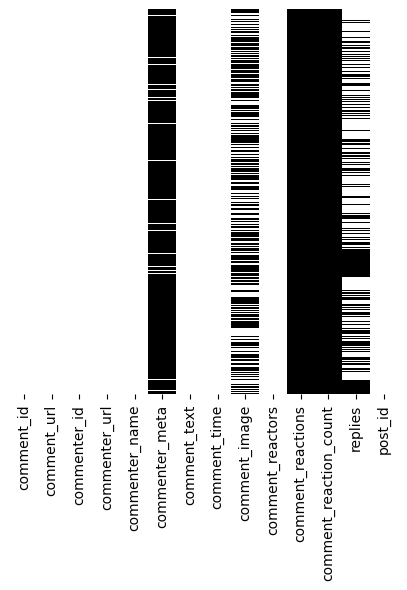

In [6]:
plt.figure(figsize=(5, 5))
sns.heatmap(comment_df.isnull(), cbar=False, cmap='binary', yticklabels=False);

### Xóa 2 cột comment_reactions, comment_reactors không chứa dữ liệu

In [7]:
comment_df.drop(columns=['comment_reaction_count', 'comment_reactions'], inplace=True)

### Xóa cột comment_reactors chứa toàn bộ các list rỗng

In [8]:
comment_df['comment_reactors'].value_counts() == comment_df.shape[0]

comment_reactors
[]    True
Name: count, dtype: bool

### Xóa các cột bị trùng comment_id

In [9]:
print(comment_df.shape[0])
comment_df = comment_df.drop_duplicates(keep='first', subset=['comment_id'])
comment_df.shape

19578


(19262, 12)

In [10]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,comment_reactors,replies,post_id
0,7293325574033680,https://facebook.com/7293325574033680,100003612977695,https://facebook.com/profile.php?id=1000036129...,Duy Mạnh,NaN,Nguyễn Quỳnh Chi kìa 🙄🙄,2023-10-25,NaN,[],<generator object PostExtractor.extract_commen...,674847581417116
1,749393307230801,https://facebook.com/749393307230801,100013343568769,https://facebook.com/chit.htoo.581730?eav=AfZN...,Cậu Cuối Hằng,NaN,Duy Mạnh 🥀Có group này cho kèo bóng hay dã man...,2023-11-04,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,[],NaN,674847581417116
2,1487108768797715,https://facebook.com/1487108768797715,100007184865648,https://facebook.com/thuantopp1904?eav=AfZ3iiR...,Đặng Thị Thuận Topp,NaN,Wo mần,2023-11-04,NaN,[],[],674847581417116
3,2324054461101038,https://facebook.com/2324054461101038,100003282592038,https://facebook.com/nhokvjz?eav=AfbauFXsyN4Kr...,Đức Anh,Top fan,:)),2023-10-25,NaN,[],[],674847581417116
4,869000111296727,https://facebook.com/869000111296727,1004645836,https://facebook.com/linh.hon.10?eav=AfZg22cKU...,Linh Trieu,NaN,Nam Anh,2023-10-25,NaN,[],<generator object PostExtractor.extract_commen...,674847581417116


### Thay thế các giá trị NaN thành các chuỗi rỗng

In [11]:
comment_df['comment_image'].fillna('', inplace=True)
comment_df['commenter_meta'].fillna('', inplace=True)

In [13]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,comment_reactors,replies,post_id
0,7293325574033680,https://facebook.com/7293325574033680,100003612977695,https://facebook.com/profile.php?id=1000036129...,Duy Mạnh,,Nguyễn Quỳnh Chi kìa 🙄🙄,2023-10-25,,[],<generator object PostExtractor.extract_commen...,674847581417116
1,749393307230801,https://facebook.com/749393307230801,100013343568769,https://facebook.com/chit.htoo.581730?eav=AfZN...,Cậu Cuối Hằng,,Duy Mạnh 🥀Có group này cho kèo bóng hay dã man...,2023-11-04,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,[],NaN,674847581417116
2,1487108768797715,https://facebook.com/1487108768797715,100007184865648,https://facebook.com/thuantopp1904?eav=AfZ3iiR...,Đặng Thị Thuận Topp,,Wo mần,2023-11-04,,[],[],674847581417116
3,2324054461101038,https://facebook.com/2324054461101038,100003282592038,https://facebook.com/nhokvjz?eav=AfbauFXsyN4Kr...,Đức Anh,Top fan,:)),2023-10-25,,[],[],674847581417116
4,869000111296727,https://facebook.com/869000111296727,1004645836,https://facebook.com/linh.hon.10?eav=AfZg22cKU...,Linh Trieu,,Nam Anh,2023-10-25,,[],<generator object PostExtractor.extract_commen...,674847581417116


### Lưu dữ liệu sau khi làm sạch

In [14]:
comment_df.to_csv(os.path.join('data', 'vebay69', 'clean', 'comments_full.csv'), index=False)